## 1. Data wrangling

This notebook contains the steps to prepare the dataset for the modelling process. These include:
1. Data collection 
2. Analysis and profiling
3. Quality check assesment
4. Data cleaning
5. Variable optimization

Firstly, it is necerssary to import the necessary packages

In [1]:
# Import the required packages

import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

%matplotlib inline

---
### 1.1. Data collection

This step involves gathering data from different sources and put together a single structure, usually a dataframe. In this case, the original dataset was already prepared by The US Energy Information Administration (EIA), and includes a meta-data file describing the variables' content.

The origin of the EIA dataset was a survey conducted in 2015 from a representative sample of the total US residential units. It comprises 5686 observations and 759 different attributes, which could be classified in higher level groups:

- Building attributes
- Building system features
- Household uses and habits
- Social and demographic characteristics
- Energy consumption features 
- Economic features
- Climate data

Not all features are relevant for this project. I will select and extract the response and explanatory variables that could be later fetched from the listing website. Finally, I will load the resulting dataset into a DataFrame object.  

In [2]:
# Import original dataset and load it into a dataframe

file = 'C:/Users/javie/OneDrive/Documents/springboard_projects/Capstone_2 - tests/listing_project/recs2015_public_v4.csv'

df = pd.read_csv(file, index_col=None)

In [3]:
df.shape

(5686, 759)

Here is an excerpt from the meta-data file with the selected variables and their meaning: 

| SAS Variable Name | Variable Description |
| -------- | --------- |
| ATTIC | Attic above the housing unit |
| ATTICFIN | Finished attic |
| BASEFIN | Finished basement |
| BEDROOMS | Number of bedrooms |
| CDD30YR | Cooling degree days, 30-year average 1981-2010, base temperature 65F |
| CDD65 | Cooling degree days in 2015, base temperature 65F |
| CELLAR | Housing unit over a basement |
| COOLTYPE | Type of air conditioning equipment used |
| DOLELCOL | Electricity cost for air conditioning (central systems and individual units), in dollars, 2015 |
| DOLELLGT | Electricity cost for indoor and outdoor lighting, in dollars, 2015 |
| DOLLAREL | Total electricity cost, in dollars, 2015 |
| EQUIPAGE | Age of main space heating equipment |
| EQUIPM | Main space heating equipment type |
| FUELHEAT | Main space heating fuel |
| HDD30YR | Heating degree days, 30-year average 1981-2010, base temperature 65F |
| HDD65 | Heating degree days in 2015, base temperature 65F |
| HIGHCEIL | High ceilings |
| IECC_CLIMATE_PUB | IECC Climate Code |
| KOWNRENT | Own or rent |
| MONEYPY | Annual gross household income for the last year |
| NCOMBATH | Number of full bathrooms |
| NHAFBATH | Number of half bathrooms |
| PRKGPLC1 | Attached garage |
| PROTHERM | Programmable main thermostat |
| RECBAT | Hot tub |
| ROOFTYPE | Major roofing material |
| SIZEOFGARAGE | Size of attached garage |
| STORIES | Number of stories in a single-family home |
| SWIMPOOL | Swimming pool |
| TOTALDOLSPH | Total cost for space heating, main and secondary, in dollars, 2015 |
| TOTALDOLWTH | Total cost for water heating, main and secondary, in dollars, 2015 | 
| TOTSQFT_EN | Total square footage (used for publication) |
| TOTROOMS | Total number of rooms in the housing unit, excluding bathrooms |
| TYPEHUQ | Type of housing unit |
| WALLTYPE | Major outside wall material |
| YEARMADERANGE | Range when housing unit was built |

In [4]:
# Select response and explanatory variables for the project

main_feat = [
            'ATTIC',
            'ATTICFIN',
            'BASEFIN',
            'BEDROOMS',
            'CDD30YR',
            'CDD65',
            'CELLAR',
            'COOLTYPE',
            'DOLELCOL',
            'DOLLAREL',
            'EQUIPAGE',
            'EQUIPM',
            'FUELHEAT',
            'HDD30YR',
            'HDD65',
            'HIGHCEIL',
            'IECC_CLIMATE_PUB',
            'KOWNRENT',
            'MONEYPY',
            'NCOMBATH',
            'NHAFBATH',
            'PRKGPLC1',
            'PROTHERM',
            'RECBATH',
            'ROOFTYPE',
            'SIZEOFGARAGE',
            'STORIES',
            'SWIMPOOL',
            'TOTALDOLSPH',
            'TOTSQFT_EN',
            'TOTROOMS',
            'TYPEHUQ',
            'WALLTYPE',
            'YEARMADERANGE', 
            'DOLELLGT',
            'TOTALDOLWTH'
            ]

In [5]:
# Update the working dataframe

df = df[main_feat]

In [6]:
# Check for number of rows and columns

df.shape

(5686, 38)

In [7]:
# Print sample

df.head()

,ATTIC,ATTICFIN,BASEFIN,BEDROOMS,CDD30YR,CDD65,CELLAR,COOLTYPE,DOLELCOL,DOLLAREL,...,SWIMPOOL,TOTALDOLSPH,TOTSQFT_EN,TOTROOMS,TYPEHUQ,USESOLAR,WALLTYPE,YEARMADERANGE,DOLELLGT,TOTALDOLWTH
0,0,-2,-2,3,1332,1768,0,1,365.46,967.23,...,0,176.59,1808,7,2,0,4,7,75.18,248.33
1,0,-2,-2,2,2494,2795,0,2,249.54,1366.00,...,0,380.52,759,4,2,0,3,5,124.51,234.49
2,0,-2,1,4,2059,2235,1,3,844.63,2428.08,...,0,601.17,2288,9,2,0,2,4,113.33,250.71
3,0,-2,1,3,1327,1374,1,1,471.13,1313.12,...,0,863.46,2573,7,2,0,3,2,64.58,114.62
4,1,0,0,3,871,993,1,1,62.05,581.07,...,0,67.87,1024,6,2,0,1,4,112.65,220.26


---
### 1.2. Analysis and profiling

In [8]:
# Inspect missingness and datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5686 entries, 0 to 5685
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ATTIC             5686 non-null   int64  
 1   ATTICFIN          5686 non-null   int64  
 2   BASEFIN           5686 non-null   int64  
 3   BEDROOMS          5686 non-null   int64  
 4   CDD30YR           5686 non-null   int64  
 5   CDD65             5686 non-null   int64  
 6   CELLAR            5686 non-null   int64  
 7   COOLTYPE          5686 non-null   int64  
 8   DOLELCOL          5686 non-null   float64
 9   DOLLAREL          5686 non-null   float64
 10  EQUIPAGE          5686 non-null   int64  
 11  EQUIPM            5686 non-null   int64  
 12  FUELHEAT          5686 non-null   int64  
 13  HDD30YR           5686 non-null   int64  
 14  HDD65             5686 non-null   int64  
 15  HIGHCEIL          5686 non-null   int64  
 16  IECC_CLIMATE_PUB  5686 non-null   object 


According to the meta-data file, variables include categorical, continuous and discrete values, which do not match the datatypes in the working dataframe.

In [9]:
# Update variables' datatypes

dtypes_dict = { 
                'ATTIC':'category',
                'ATTICFIN':'category',
                'BASEFIN':'category',
                'BEDROOMS':'int64',
                'CDD30YR':'float64',
                'CDD65':'float64',
                'CELLAR':'category',
                'COOLTYPE':'category',
                'DOLELCOL':'float64',
                'DOLLAREL':'float64',
                'EQUIPAGE':'category',
                'EQUIPM':'category',
                'FUELHEAT':'category',
                'HDD30YR':'float64',
                'HDD65':'float64',
                'HIGHCEIL':'category',
                'IECC_CLIMATE_PUB':'category',
                'KOWNRENT':'category',
                'MONEYPY':'category',
                'NCOMBATH':'int64',
                'NHAFBATH':'int64',
                'PRKGPLC1':'category',
                'PROTHERM':'category',
                'RECBATH':'category',
                'ROOFTYPE':'category',
                'SIZEOFGARAGE':'category',
                'STORIES':'category',
                'SWIMPOOL':'category',
                'TOTALDOLSPH':'float64',
                'TOTSQFT_EN':'float64',
                'TOTROOMS':'int64',
                'TYPEHUQ':'category',
                'WALLTYPE':'category',
                'YEARMADERANGE':'category',
                'DOLELLGT':'float64',
                'TOTALDOLWTH':'float64' 
              }

df = df.astype(dtypes_dict)

In [10]:
# Change category names in category variables for better readability

cooltype = {1:'Central AC', 2:'Individual units', 3:'Both central and individual', -2:'NA'}
df['COOLTYPE'].replace(cooltype, inplace=True)

equipage = {1:'-2 yrs', 2:'2-4 yrs', 3:'5-9 yrs', 41:'10-14 yrs', 42:'15-19 yrs', 5:'+20 yrs', -2:'NA'}
df['EQUIPAGE'].replace(equipage, inplace=True)

equipm = {2:'Steam/hot water system', 3:'Central furnace', 4:'Heat pump', 5:'Built-in electric units', 6:'Built-in pipeless furnace', 7:'Built-in room gas/oil heater', 8:'Wood-burning stove', 9:'Fireplace', 10:'Portable electric heaters', 21:'Other', -2:'NA'}
df['EQUIPM'].replace(equipm, inplace=True)

fuelheat = {1:'Natural gas', 2:'Propane', 3:'Fuel oil/kerosene', 5:'Electricity', 7:'Wood', 21:'Other', -2:'NA'}
df['FUELHEAT'].replace(fuelheat, inplace=True)

kownrent = {1:'Owned', 2:'Rented', 3:'Occupied'}
df['KOWNRENT'].replace(kownrent, inplace=True)

moneypy = {1:'-$20,000', 2:'$20,000-$39,999', 3:'$40,000-$59,999', 4:'$60,000-$79,999', 5:'$80,000-$99,999', 6:'$100,000-$119,999', 7:'$120,000-$139,999', 8:'+$140,000'}
df['MONEYPY'].replace(moneypy, inplace=True)

rooftype = {1:'Ceramic tiles', 2:'Wood shingles', 3:'Metal', 4:'Slate/synthetic shake', 5:'Shingles', 7:'Concrete tiles', 9:'Other', -2:'NA'}
df['ROOFTYPE'].replace(rooftype, inplace=True)

stories = {10:'1', 20:'2', 31:'3', 32:'+4', 40:'Split-level', -2:'NA'} 
df['STORIES'].replace(stories, inplace=True)

typehuq = {1:'Mobile home', 2:'Detached house', 3:'Attached house', 4:'Apartment in bld with 2-4 units', 5:'Apartment in bld with 5+ units'}
df['TYPEHUQ'].replace(typehuq, inplace=True)

walltype = {1:'Brick', 2:'Wood', 3:'Siding', 4:'Stucco', 5:'Shingle', 6:'Stone', 7:'Concrete or concrete block', 9:'Other'}
df['WALLTYPE'].replace(walltype, inplace=True)

yearmaderange = {1:'-1950', 2:'1950-1959', 3:'1960-1969', 4:'1970-1979', 5:'1980-1989', 6:'1990-1999', 7:'2000-2009', 8:'2010-2015'}
df['YEARMADERANGE'].replace(yearmaderange, inplace=True)

In [11]:
# Check summary statistics for numerical variables

df.describe().T

,count,mean,std,min,25%,50%,75%,max
BEDROOMS,5686.0,2.832923,1.106412,0.00,2.0000,3.000,3.0000,10.00
CDD30YR,5686.0,1450.646852,1027.063514,0.00,712.0000,1150.500,1880.5000,5792.00
CDD65,5686.0,1719.206120,1193.562960,0.00,793.0000,1378.000,2231.0000,6607.00
DOLELCOL,5686.0,237.380515,277.863400,0.00,48.3650,146.605,328.2625,2860.01
DOLLAREL,5686.0,1403.779063,817.479147,18.72,815.1175,1253.015,1830.8275,8121.56
HDD30YR,5686.0,4086.629968,2189.236780,0.00,2102.5000,4353.000,5966.7500,12184.00
HDD65,5686.0,3707.848751,2149.272713,0.00,1881.0000,3877.500,5467.0000,9843.00
NCOMBATH,5686.0,1.746395,0.747473,0.00,1.0000,2.000,2.0000,6.00
NHAFBATH,5686.0,0.318326,0.512265,0.00,0.0000,0.000,1.0000,4.00
TOTALDOLSPH,5686.0,511.110366,482.333423,0.00,164.0200,400.845,695.2075,4766.66


---
**Numerical variables are plotted below individually for further inspection**

In [12]:
# Create a function to generate a PMF plot

def Pmf(series, Title):
    '''Generates a probability mass function (PMF) of a pandas series'''
    pmf = series.value_counts()*100 / len(series)
    plt.bar(series.unique(), pmf)
    plt.xticks(series.unique())
    plt.ylabel('Frequency')
    plt.title(Title, fontsize='x-large', fontweight='bold')

Broad classification for residential units are shown below. These are perhaps the most determinant factors for the response variable.

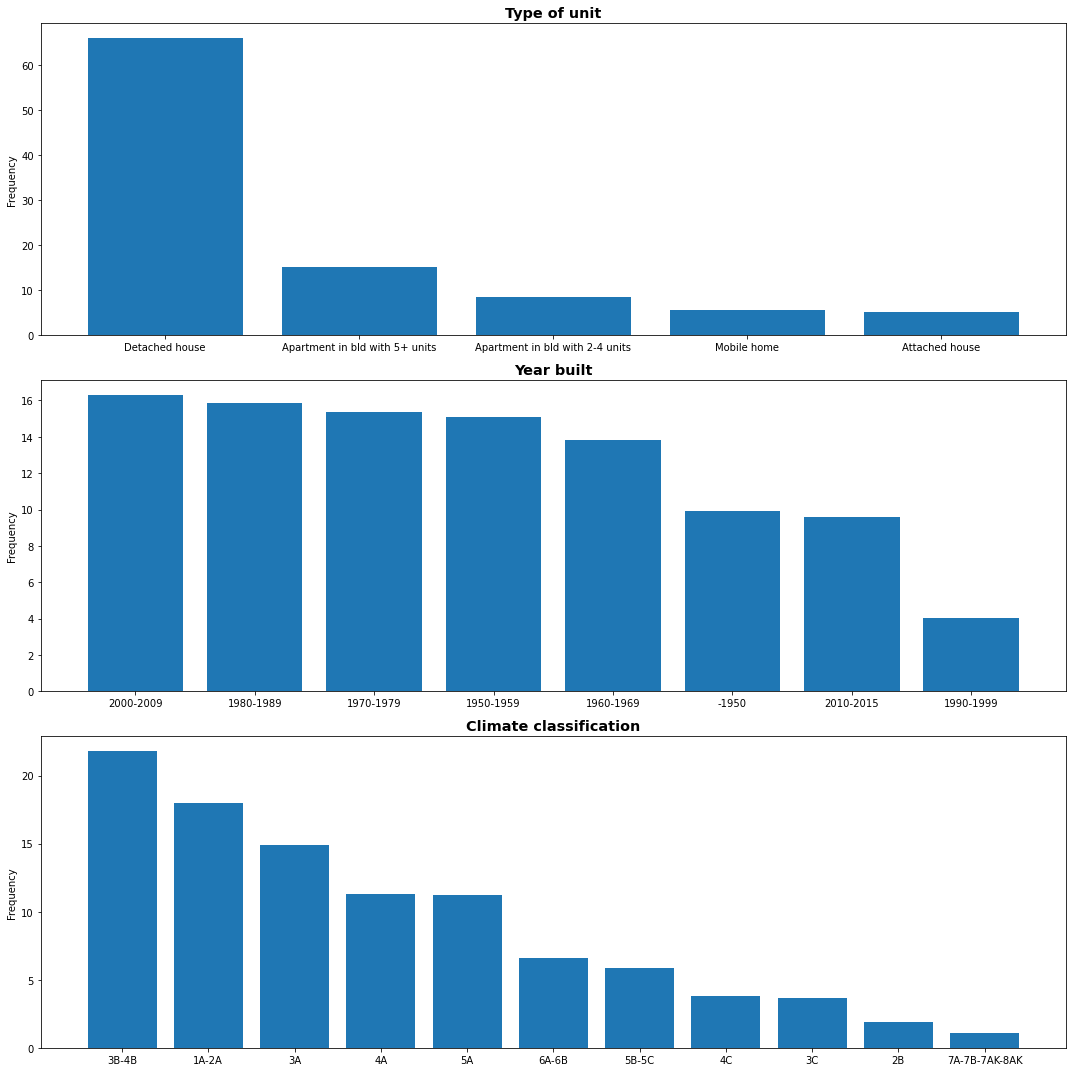

In [13]:
fig = plt.figure(figsize=(15,15), dpi=72)

# Plot type of housing unit
plt.subplot(3,1,1)
Pmf(df['TYPEHUQ'], 'Type of unit')

# Plot year built
plt.subplot(3,1,2)
Pmf(df['YEARMADERANGE'], 'Year built')

# Plot climate classification
plt.subplot(3,1,3)
Pmf(df['IECC_CLIMATE_PUB'], 'Climate classification')

plt.tight_layout()
plt.show()

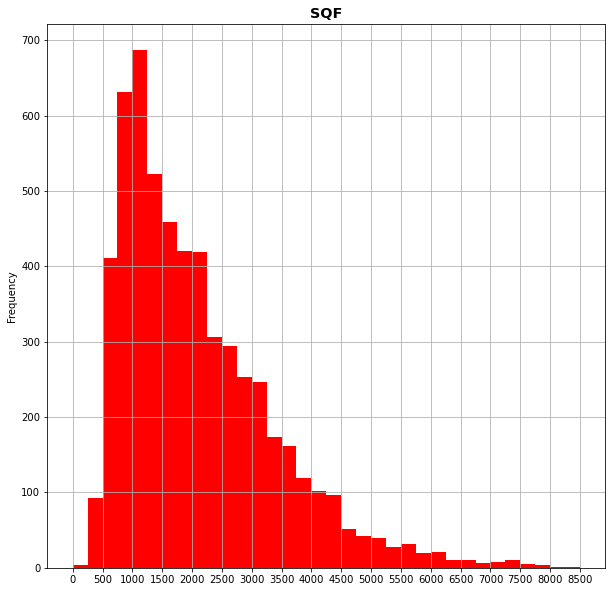

In [14]:
# Plot histogram for floor area measurements

sqf = df['TOTSQFT_EN']

# Creates figure and plot 
fig = plt.figure(figsize=(10,10), dpi=72)
sqf.plot.hist(bins=34, color='red', range=[0,8500])

# Adjust graphic appearance
plt.grid()
x_list = [i*500 for i in range(0,18)]
plt.xticks(x_list, x_list)
plt.title('SQF', fontsize='x-large', fontweight='bold')

plt.show()

PMF plots for different **building system** features are shown in the cell below

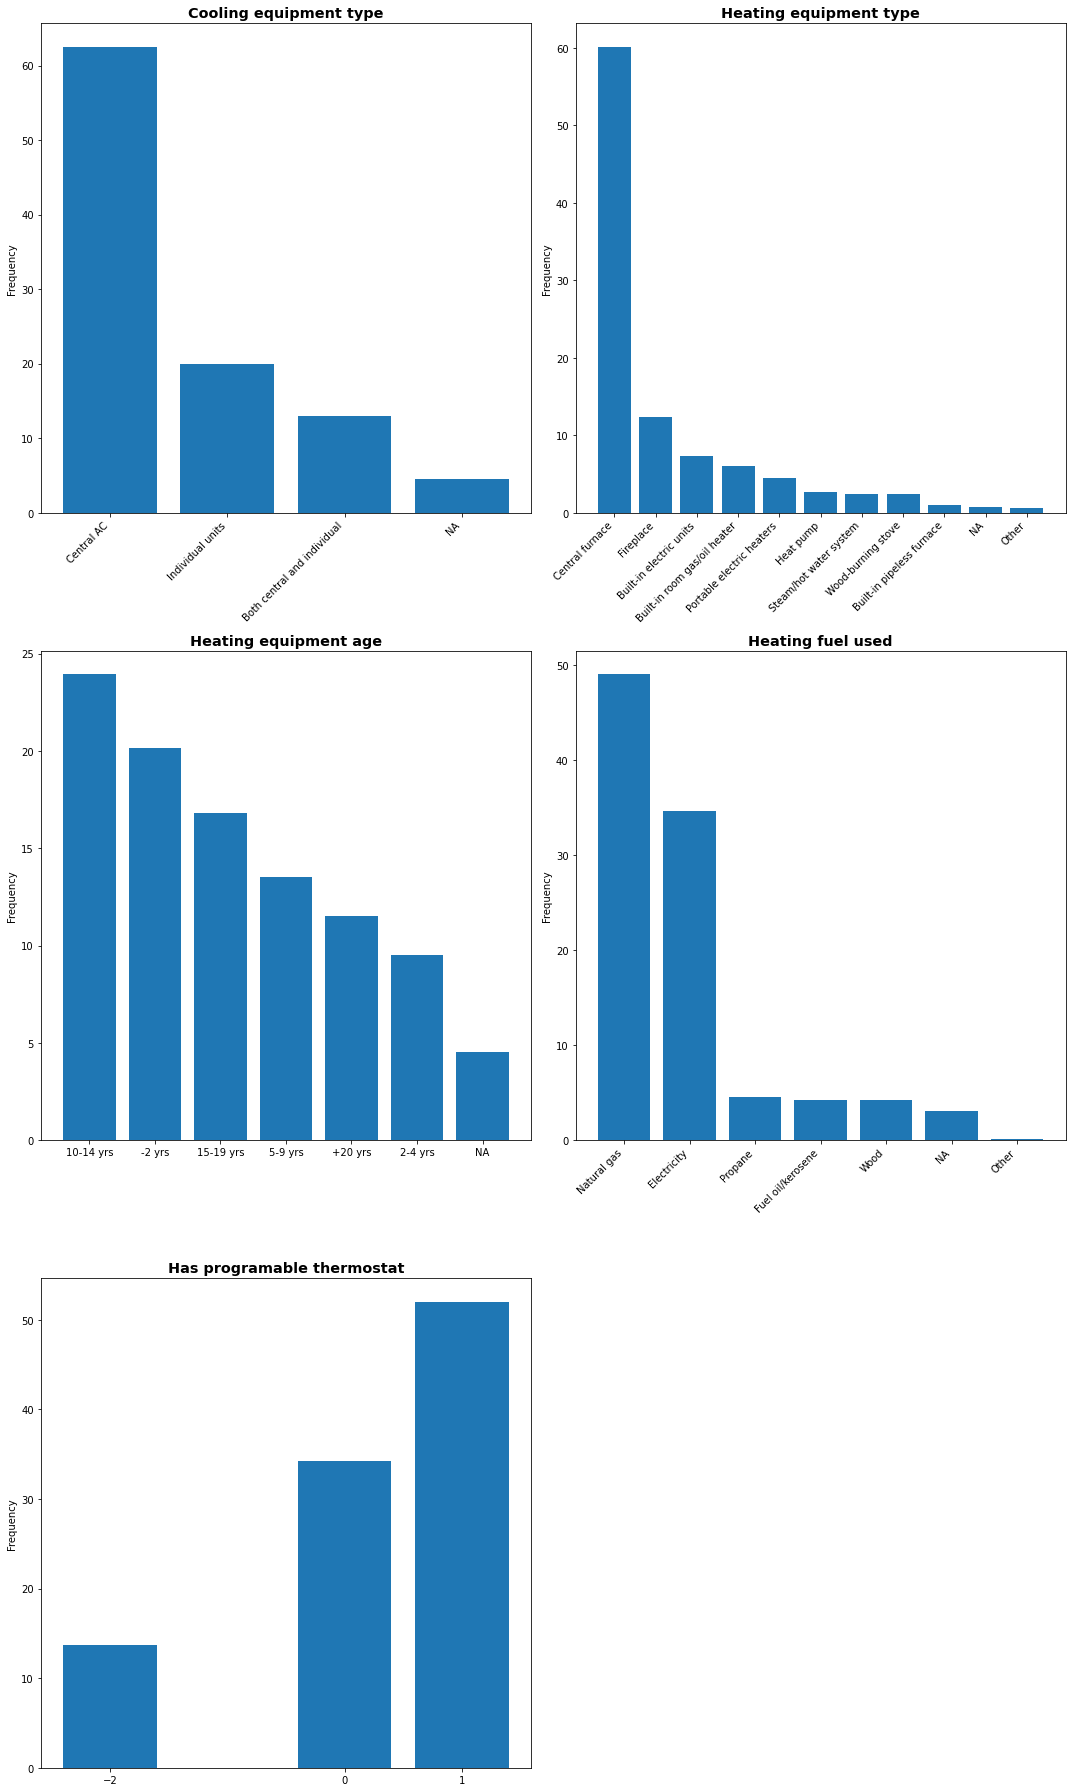

In [39]:
# Plot PMF of categorical variables

fig = plt.figure(figsize=(15,25), dpi=72)

plt.subplot(3,2,1)
Pmf(df['COOLTYPE'], 'Cooling equipment type')
plt.xticks(rotation=45, horizontalalignment='right')

plt.subplot(3,2,2)
Pmf(df['EQUIPM'], 'Heating equipment type')
plt.xticks(rotation=45, horizontalalignment='right')

plt.subplot(3,2,3)
Pmf(df['EQUIPAGE'], 'Heating equipment age')

plt.subplot(3,2,4)
Pmf(df['FUELHEAT'], 'Heating fuel used')
plt.xticks(rotation=45, horizontalalignment='right')

plt.subplot(3,2,5)
Pmf(df['PROTHERM'], 'Has programable thermostat')

plt.tight_layout()
plt.show()

I will replace "Non Applicable" (NA) values in non numeric categories above by NaN for better missing values inspection and handling

In [16]:
# Replace all Not Applicable (NA) values for NaN

df['COOLTYPE'].replace('NA', np.nan, inplace=True)
df['EQUIPM'].replace('NA', np.nan, inplace=True)
df['EQUIPAGE'].replace('NA', np.nan, inplace=True)
df['FUELHEAT'].replace('NA', np.nan, inplace=True)

In the next three cells, it can be seen the distribution of other variables accounting for **unit's general features**

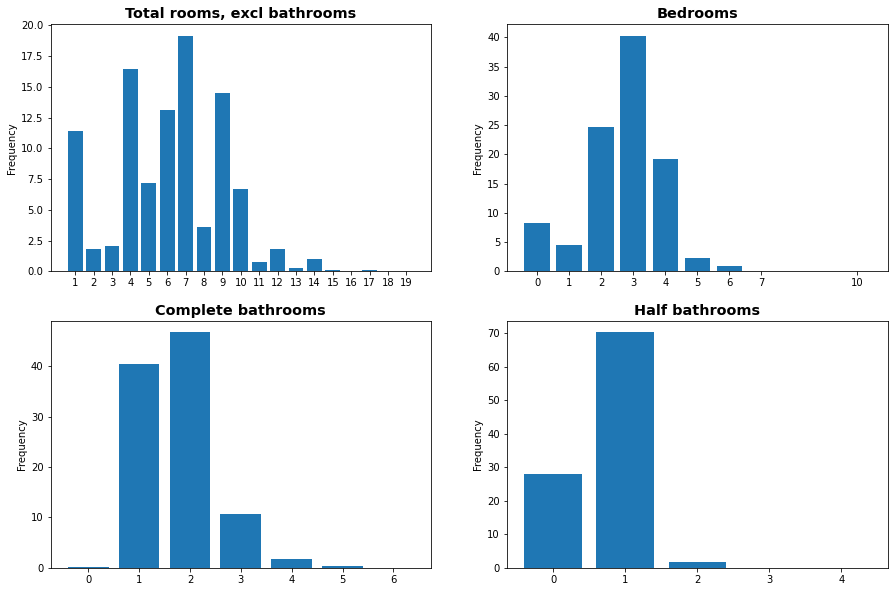

In [17]:
# Plot PMF of discrete variables

fig = plt.figure(figsize=(15,10), dpi=72)

plt.subplot(2,2,1)
Pmf(df['TOTROOMS'], 'Total rooms, excl bathrooms')

plt.subplot(2,2,2)
Pmf(df['BEDROOMS'], 'Bedrooms')

plt.subplot(2,2,3)
Pmf(df['NCOMBATH'], 'Complete bathrooms')

plt.subplot(2,2,4)
Pmf(df['NHAFBATH'], 'Half bathrooms')

plt.show()

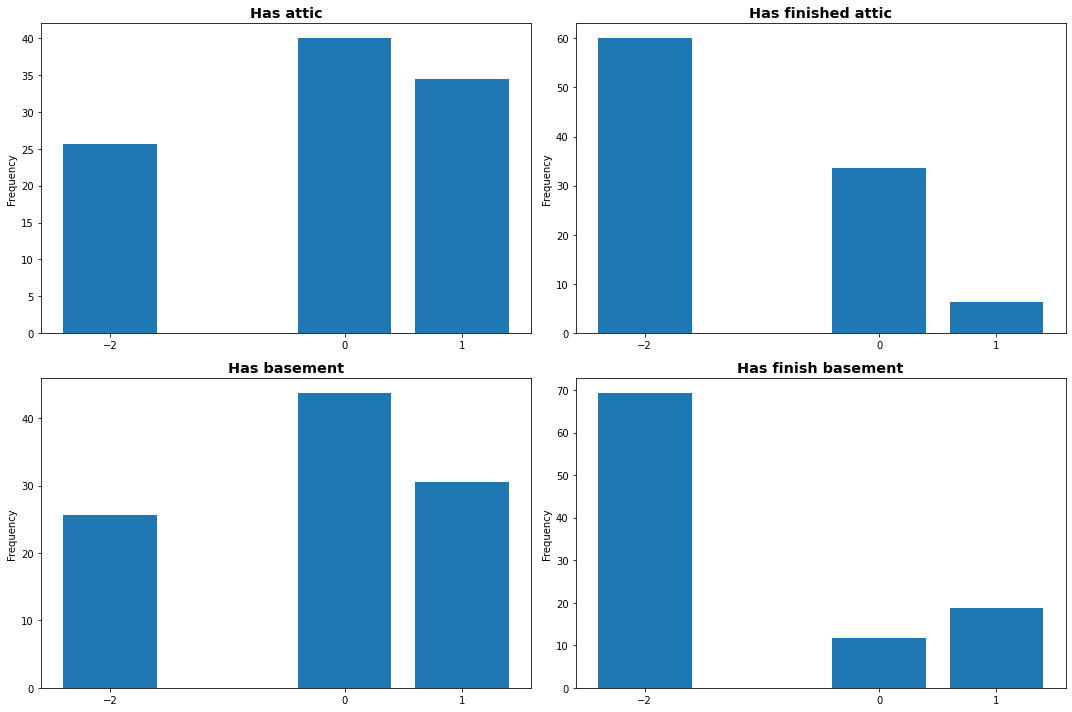

In [18]:
# Plot PMF of categorical variables

fig = plt.figure(figsize=(15,10), dpi=72)

plt.subplot(2,2,1)
Pmf(df['ATTIC'], 'Has attic')

plt.subplot(2,2,2)
Pmf(df['ATTICFIN'], 'Has finished attic')

plt.subplot(2,2,3)
Pmf(df['CELLAR'], 'Has basement')

plt.subplot(2,2,4)
Pmf(df['BASEFIN'], 'Has finish basement')

plt.tight_layout()
plt.show()

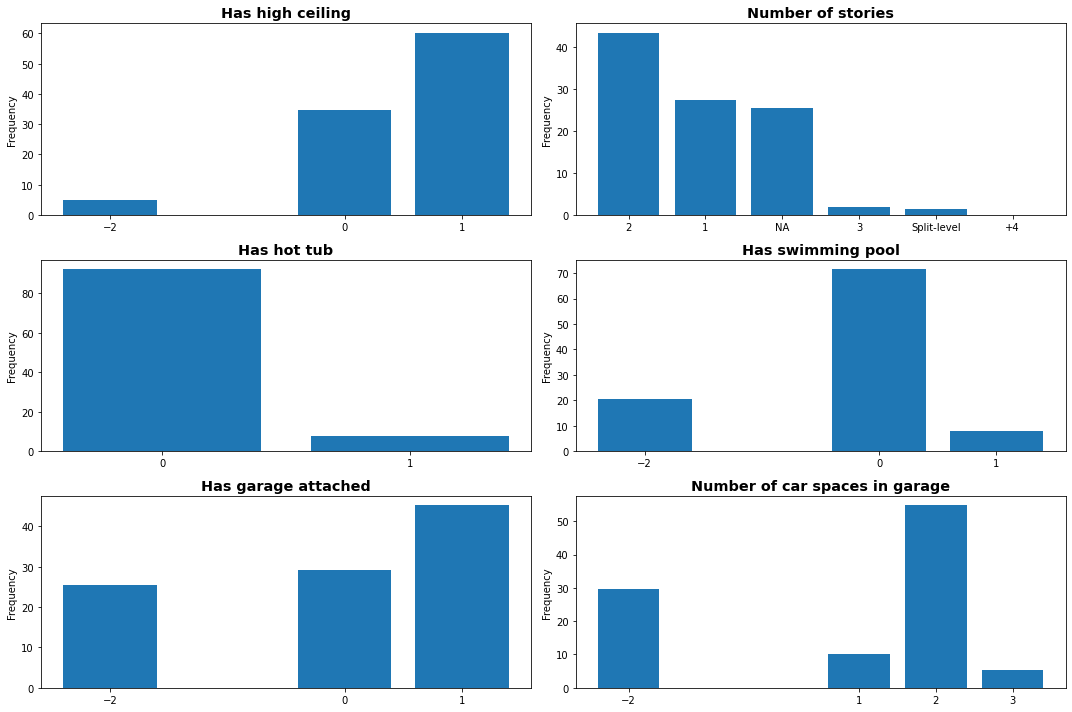

In [20]:
# Plot PMF of categorical and numerical variables

fig = plt.figure(figsize=(15,10), dpi=72)

plt.subplot(3,2,1)
Pmf(df['HIGHCEIL'], 'Has high ceiling')

plt.subplot(3,2,2)
Pmf(df['STORIES'], 'Number of stories')

plt.subplot(3,2,3)
Pmf(df['RECBATH'], 'Has hot tub')

plt.subplot(3,2,4)
Pmf(df['SWIMPOOL'], 'Has swimming pool')

plt.subplot(3,2,5)
Pmf(df['PRKGPLC1'], 'Has garage attached')

plt.subplot(3,2,6)
Pmf(df['SIZEOFGARAGE'], 'Number of car spaces in garage')

plt.tight_layout()
plt.show()

In [ ]:
df['STORIES'].replace('NA', np.nan, inplace=True)

Construction attributes are plotted below

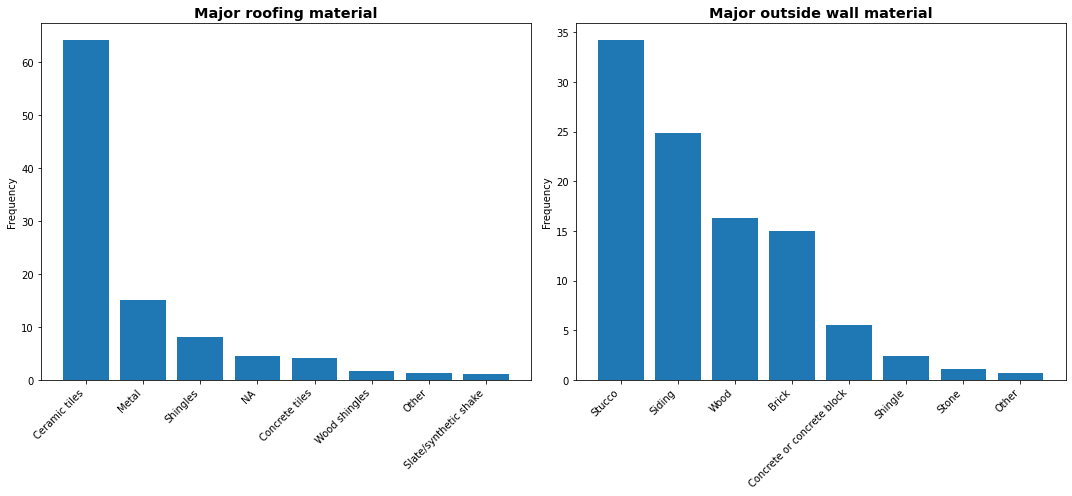

In [37]:
# Plot PMF of categorical variables

fig = plt.figure(figsize=(15,7), dpi=72)

plt.subplot(1,2,1)
Pmf(df['ROOFTYPE'], 'Major roofing material')
plt.xticks(rotation=45, horizontalalignment='right')

plt.subplot(1,2,2)
Pmf(df['WALLTYPE'], 'Major outside wall material')
plt.xticks(rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()

In [ ]:
df['ROOFTYPE'].replace('NA', np.nan, inplace=True)

Social and demographic related variables are depicted in the cell below

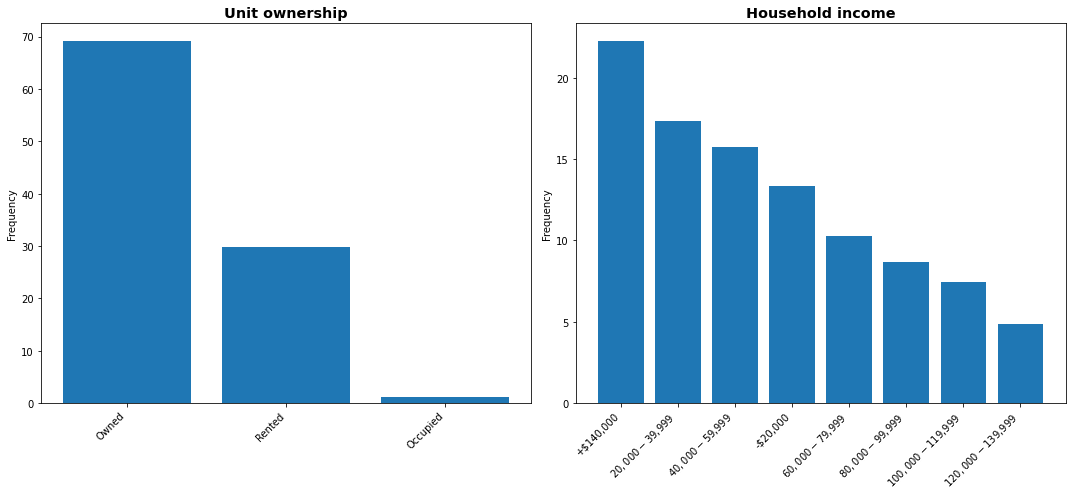

In [38]:
# Plot PMF of categorical variables

fig = plt.figure(figsize=(15,7), dpi=72)

plt.subplot(1,2,1)
Pmf(df['KOWNRENT'], 'Unit ownership')
plt.xticks(rotation=45, horizontalalignment='right')

plt.subplot(1,2,2)
Pmf(df['MONEYPY'], 'Household income')
plt.xticks(rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()

Lastly, histograms of the response variables are shown below.

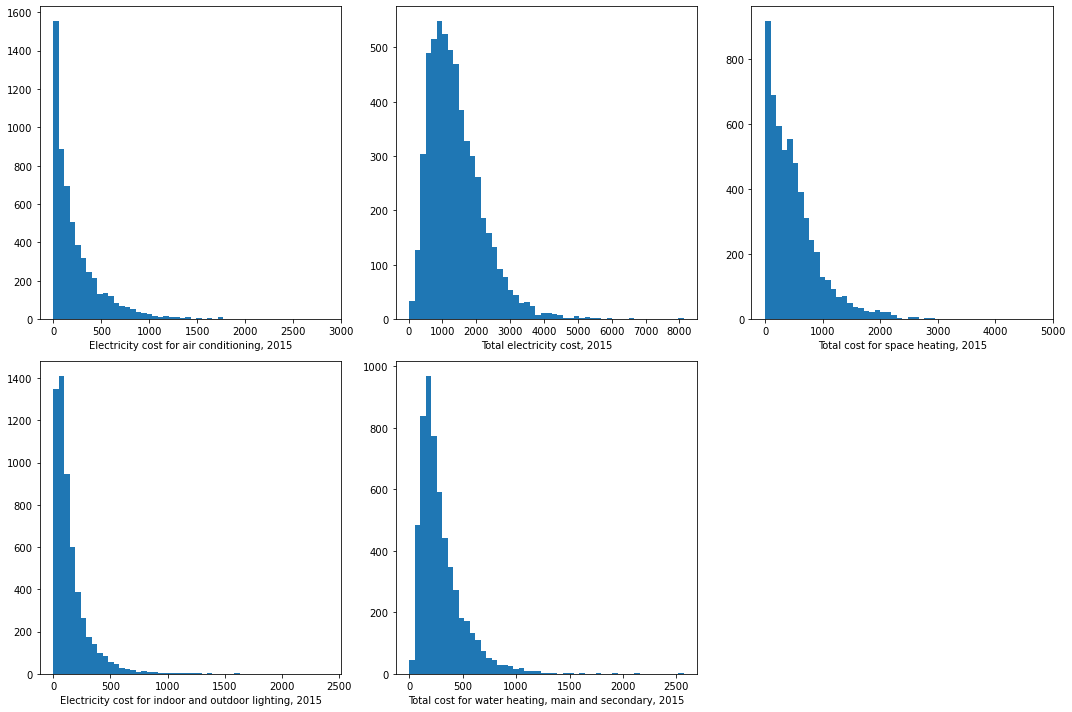

In [21]:
# Plot histograms of utility dollar spending

fig = plt.figure(figsize=(15,10), dpi=72)

plt.subplot(2,3,1)
plt.hist(df['DOLELCOL'], bins=50)
plt.xlabel('Electricity cost for air conditioning, 2015')

plt.subplot(2,3,2)
plt.hist(df['DOLLAREL'], bins=50)
plt.xlabel('Total electricity cost, 2015')

plt.subplot(2,3,3)
plt.hist(df['TOTALDOLSPH'], bins=50)
plt.xlabel('Total cost for space heating, 2015')

plt.subplot(2,3,4)
plt.hist(df['DOLELLGT'], bins=50)
plt.xlabel('Electricity cost for indoor and outdoor lighting, 2015')

plt.subplot(2,3,5)
plt.hist(df['TOTALDOLWTH'], bins=50)
plt.xlabel('Total cost for water heating, main and secondary, 2015')

plt.tight_layout()
plt.show()

Remaining "Non applicable" (NA) values are replaced in the entire dataframe for np.NaN values for better inspection and handling 

In [ ]:
# Replace -2 (non applicable) values in numeric variables

df.replace(-2, np.nan, inplace=True)

The resulting dataframe is loaded in a csv file for further missigness analysis and data transformation in a different notebook. 

In [22]:
# Writing df dataframe to csv

path = 'C:/Users/javie/OneDrive/Documents/springboard_projects/Capstone_2 - tests/listing_project/pre-selected.csv'

df.to_csv(path)